<a href="https://colab.research.google.com/github/bonaerges/pia/blob/main/TareaDeepLearningKerasconMejoras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.activations import elu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Activation,Conv2D, MaxPooling2D
from tensorflow.keras.initializers import HeNormal
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Parte A: Construcción y Entrenamiento Inicial


## Construcción de la Red Neuronal:

  ## 20 capas ocultas, cada una con 100 neuronas.

*   20 capas ocultas, cada una con 100 neuronas

*   Inicialización de Xavier/Glorot.

*   Función de activación ELU.
*   Entrenamiento de la Red:
**   Uso del optimizador Adam.
**   Implementación de la detención temprana.

# Parte B: Integración de Mejoras y Comparación

*   Normalización por Lotes
 Implementación y comparación de la velocidad de convergencia y el impacto en
el tiempo de entrenamiento.


## Implementación y comparación de la velocidad de convergencia y el impacto en el tiempo de entrenamiento.
##Sustitución de Normalización por Lotes con ReLU:

## Uso de la inicialización He.
## Comparación de rendimiento entre configuraciones.

# Parte C: Avanzando en Regularización y Optimización
## Dropout y MC Dropout:
## Implementación de dropout.
## Evaluación con MC dropout sin reentrenamiento.
## Análisis de los efectos.

###Parte A: Construcción y Entrenamiento Inicial
### Cargar y prepara el dataset SVHN (Parte A, paso 1)

In [ ]:
def load_data():
    (train_data, test_data), ds_info = tfds.load(
        'svhn_cropped',
        split=['train', 'test'],
        as_supervised=True,
        with_info=True,
        batch_size=-1
    )
    return train_data, test_data, ds_info

## Cargar y preparar datos

In [ ]:
train_data, test_data, ds_info = load_data()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteUD2TBK/svhn_cropped-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteUD2TBK/svhn_cropped-test.tfrecord*...:   0%| …

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteUD2TBK/svhn_cropped-extra.tfrecord*...:   0%|…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


### Preprocesar los datos (Parte A, paso 1)

In [ ]:
def preprocess(data, info):
    x, y = data
    x = tf.image.convert_image_dtype(x, tf.float32)
    y = tf.one_hot(y, depth=info.features['label'].num_classes)
    return x, y

In [ ]:
train_data = preprocess(train_data, ds_info)
test_data = preprocess(test_data, ds_info)

### Construir el modelo inicial con Xavier/Glorot y ELU (Parte A, paso 1 y 2)
### 20 capas ocultas, cada una con 100 neuronas

In [ ]:
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, activation=elu, kernel_initializer=GlorotUniform()))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Construir y entrenar el modelo inicial, y  entrenamiento inicial (Parte A)


In [ ]:
model = build_model(train_data[0].shape[1:], ds_info.features['label'].num_classes)

 # Compilar y entrenar el modelo (Parte A, paso 2)

In [ ]:
def compile_and_train(model, train_data, val_data, epochs=50):
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(train_data[0], train_data[1], epochs=epochs,
                        validation_data=val_data, callbacks=[early_stopping])
    return history

In [ ]:
history = compile_and_train(model, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 32s 11ms/step - loss: 2.2492 - accuracy: 0.1839 - val_loss: 2.2261 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 25s 11ms/step - loss: 2.2401 - accuracy: 0.1882 - val_loss: 2.2275 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 25s 11ms/step - loss: 2.2386 - accuracy: 0.1891 - val_loss: 2.2245 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 23s 10ms/step - loss: 2.2388 - accuracy: 0.1889 - val_loss: 2.2253 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 22s 10ms/step - loss: 2.2389 - accuracy: 0.1886 - val_loss: 2.2296 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 22s 10ms/step - loss: 2.2374 - accuracy: 0.1892 - val_loss: 2.2258 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 22s 10ms/step - loss: 2.2374 - accuracy: 0.1892 - val_loss: 2.2238 -

### Construir y entrenar el modelo con normalización por lotes
### Función para construir el modelo con normalización por lotes (Parte B, paso 1)

In [ ]:
def build_model_with_batchnorm(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, kernel_initializer=GlorotUniform()))
        model.add(BatchNormalization())
        model.add(Activation('elu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
model_bn = build_model_with_batchnorm(train_data[0].shape[1:], ds_info.features['label'].num_classes)

### Mejora con batch normalization (Parte B, paso 1)

In [ ]:
history_bn = compile_and_train(model_bn, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 82s 29ms/step - loss: 1.5671 - accuracy: 0.4772 - val_loss: 1.6748 - val_accuracy: 0.4588
Epoch 2/50
2290/2290 [==============================] - 63s 28ms/step - loss: 1.2904 - accuracy: 0.5919 - val_loss: 1.7388 - val_accuracy: 0.4508
Epoch 3/50
2290/2290 [==============================] - 62s 27ms/step - loss: 1.1798 - accuracy: 0.6356 - val_loss: 1.4272 - val_accuracy: 0.5410
Epoch 4/50
2290/2290 [==============================] - 64s 28ms/step - loss: 1.1080 - accuracy: 0.6575 - val_loss: 1.3667 - val_accuracy: 0.5579
Epoch 5/50
2290/2290 [==============================] - 65s 28ms/step - loss: 1.0455 - accuracy: 0.6779 - val_loss: 1.1384 - val_accuracy: 0.6482
Epoch 6/50
2290/2290 [==============================] - 64s 28ms/step - loss: 0.9989 - accuracy: 0.6920 - val_loss: 1.1277 - val_accuracy: 0.6400
Epoch 7/50
2290/2290 [==============================] - 62s 27ms/step - loss: 0.9573 - accuracy: 0.7044 - val_loss: 0.9811 -

### Función para construir el modelo con ReLU y He (Parte B, paso 2)
### 20 capas ocultas, cada una con 100 neuronas

In [ ]:
def build_model_with_relu_he(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, kernel_initializer=HeNormal()))
        model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Construir y entrenar el modelo con ReLU y He

In [ ]:
model_relu_he = build_model_with_relu_he(train_data[0].shape[1:], ds_info.features['label'].num_classes)

In [ ]:
history_relu_he = compile_and_train(model_relu_he, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 28s 10ms/step - loss: 2.2410 - accuracy: 0.1887 - val_loss: 2.2247 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 22s 10ms/step - loss: 2.2375 - accuracy: 0.1892 - val_loss: 2.2253 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 22s 10ms/step - loss: 2.2372 - accuracy: 0.1892 - val_loss: 2.2245 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 22s 9ms/step - loss: 2.2370 - accuracy: 0.1892 - val_loss: 2.2255 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 22s 10ms/step - loss: 2.2370 - accuracy: 0.1892 - val_loss: 2.2247 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 23s 10ms/step - loss: 2.2369 - accuracy: 0.1892 - val_loss: 2.2259 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 23s 10ms/step - loss: 2.2371 - accuracy: 0.1892 - val_loss: 2.2254 - 

### Imprimir las métricas del entrenamiento para comparación

In [ ]:
print("Historial inicial:", history.history)
print("Historial con Normalización por Lotes:", history_bn.history)
print("Historial con ReLU y He:", history_relu_he.history)

Historial inicial: {'loss': [2.2492222785949707, 2.24007511138916, 2.2385880947113037, 2.238797903060913, 2.23892879486084, 2.237374782562256, 2.2373769283294678, 2.2376813888549805, 2.2372546195983887, 2.238009452819824, 2.2371275424957275, 2.2370307445526123, 2.2375142574310303, 2.236882209777832, 2.236990213394165, 2.2370452880859375, 2.2371041774749756], 'accuracy': [0.18394146859645844, 0.1881594955921173, 0.18914233148097992, 0.18885567784309387, 0.18856900930404663, 0.18921059370040894, 0.18921059370040894, 0.1890331357717514, 0.18921059370040894, 0.1890331357717514, 0.18921059370040894, 0.18921059370040894, 0.18899217247962952, 0.18921059370040894, 0.18921059370040894, 0.18921059370040894, 0.18914233148097992], 'val_loss': [2.2261295318603516, 2.227452278137207, 2.22452712059021, 2.2252814769744873, 2.2296323776245117, 2.2258238792419434, 2.2237892150878906, 2.2250072956085205, 2.2244374752044678, 2.225780963897705, 2.2247443199157715, 2.223728895187378, 2.224350929260254, 2.22

## Parte C: Avanzando en Regularización y Optimización
* Introducir Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

### Función para construir el modelo con dropout (Parte C, paso 1)

In [ ]:
def build_model_with_dropout(input_shape, num_classes, dropout_rate=0.5):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(20):
        model.add(Dense(100, activation='elu', kernel_initializer=GlorotUniform()))
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Función para realizar predicciones utilizando MC Dropout (Parte C, paso 2)

In [ ]:
def mc_dropout_predict(model, data, num_samples=100):
    predictions = [model(data, training=True) for _ in range(num_samples)]
    return tf.reduce_mean(predictions, axis=0)

### Construir y entrenar el modelo con dropout



In [ ]:
model_dropout = build_model_with_dropout(train_data[0].shape[1:], ds_info.features['label'].num_classes)
history_dropout = compile_and_train(model_dropout, train_data, test_data)

Epoch 1/50
2290/2290 [==============================] - 31s 11ms/step - loss: 2.4959 - accuracy: 0.1520 - val_loss: 2.2288 - val_accuracy: 0.1959
Epoch 2/50
2290/2290 [==============================] - 24s 11ms/step - loss: 2.2514 - accuracy: 0.1839 - val_loss: 2.2243 - val_accuracy: 0.1959
Epoch 3/50
2290/2290 [==============================] - 24s 10ms/step - loss: 2.2497 - accuracy: 0.1849 - val_loss: 2.2281 - val_accuracy: 0.1959
Epoch 4/50
2290/2290 [==============================] - 24s 11ms/step - loss: 2.2497 - accuracy: 0.1836 - val_loss: 2.2267 - val_accuracy: 0.1959
Epoch 5/50
2290/2290 [==============================] - 24s 11ms/step - loss: 2.2509 - accuracy: 0.1835 - val_loss: 2.2274 - val_accuracy: 0.1959
Epoch 6/50
2290/2290 [==============================] - 25s 11ms/step - loss: 2.2499 - accuracy: 0.1837 - val_loss: 2.2333 - val_accuracy: 0.1959
Epoch 7/50
2290/2290 [==============================] - 25s 11ms/step - loss: 2.2497 - accuracy: 0.1836 - val_loss: 2.2293 -

### Utilizar MC Dropout para evaluar el modelo en el conjunto de test,  Evluación con MC Dropout (Parte C, paso 2)

In [ ]:
mc_predictions = mc_dropout_predict(model_dropout, test_data[0])


###  Calcular la precisión final con MC Dropout

In [ ]:
mc_accuracy = tf.metrics.categorical_accuracy(test_data[1], mc_predictions)
mc_accuracy_mean = tf.reduce_mean(mc_accuracy)

### Imprimir las métricas

In [ ]:
print("Historial con Dropout:", history_dropout.history)
print("Precisión media con MC Dropout:", mc_accuracy_mean.numpy())

Historial con Dropout: {'loss': [2.495887279510498, 2.2513513565063477, 2.249732494354248, 2.2497031688690186, 2.2508950233459473, 2.2499232292175293, 2.2496538162231445], 'accuracy': [0.15204007923603058, 0.18387320637702942, 0.18491065502166748, 0.1835729032754898, 0.1834636926651001, 0.1836548000574112, 0.1836138516664505], 'val_loss': [2.2288424968719482, 2.224316358566284, 2.2281417846679688, 2.226691722869873, 2.2273740768432617, 2.233281135559082, 2.229280948638916], 'val_accuracy': [0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044, 0.19587430357933044]}
Precisión media con MC Dropout: 0.1958743


## Gráficos de las Curvas de Entrenamiento y Validación

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [ ]:
def plot_history(histories, titles):
    plt.figure(figsize=(14, 5))
    for i, (history, title) in enumerate(zip(histories, titles)):
        plt.subplot(1, len(histories), i+1)
        plt.plot(history.history['accuracy'], label='train_accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.title('Model Accuracy - ' + title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### Suponiendo que history, history_bn, history_relu_he, history_dropout son los históricos obtenidos de cada modelo

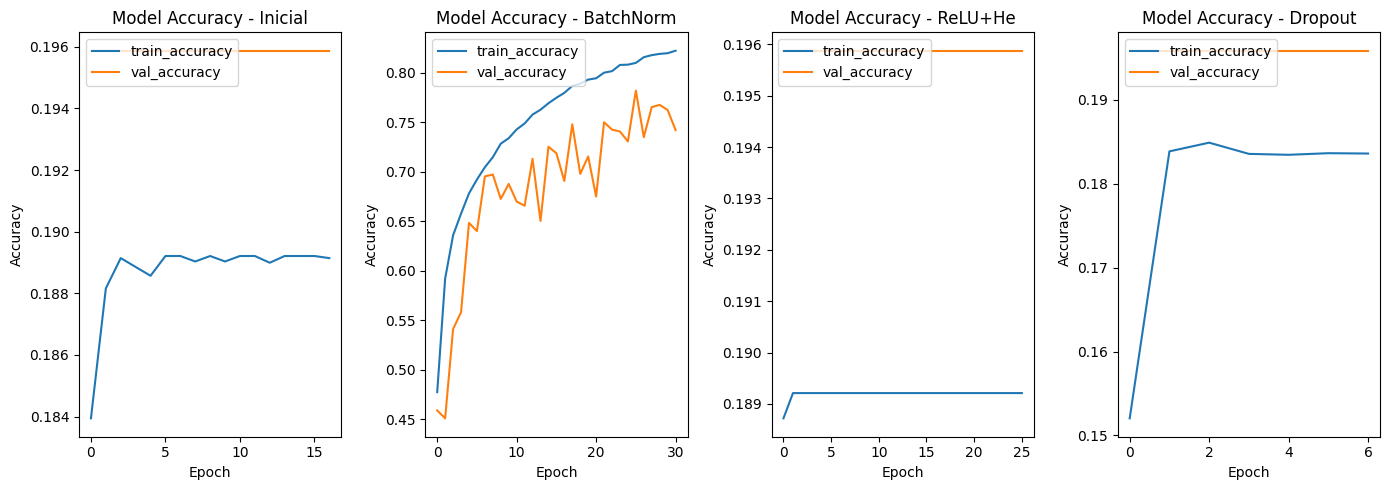

In [ ]:
plot_history([history, history_bn, history_relu_he, history_dropout],
             ['Inicial', 'BatchNorm', 'ReLU+He', 'Dropout'])

### Sugerencias para Futuras Exploraciones:
### Optimización de Hiperparámetros

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch

### Funcion

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))  # Ajusta según la forma de tus datos de entrada

    # Permite a Keras Tuner decidir el número de neuronas en las primeras dos capas Dense
    for i in range(2):  # Dos capas densas
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))  # Ajusta según el número de clases

    # Permite a Keras Tuner decidir la tasa de aprendizaje
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy'])

    return model

### # Crear el tuner y realizar la búsqueda de hiperparámetros

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Número máximo de configuraciones de prueba
    executions_per_trial=2,  # Número de modelos que se entrenan por prueba
    directory='logs',  # Directorio para almacenar logs
    project_name='keras_tuner_demo')

In [ ]:
# Suponiendo que x_train y y_train están definidos
tuner.search(train_data, test_data epochs=10, validation_split=0.2)

# Obtiene el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el mejor modelo
loss, accuracy = best_model.evaluate(train_data, test_data)
print(f"Loss: {loss}, Accuracy: {accuracy}")

NameError: name 'tra' is not defined

### SVHN con CNN

In [ ]:
def load_data():
    (train_data, test_data), ds_info = tfds.load(
        'svhn_cropped',
        split=['train', 'test'],
        as_supervised=True,
        with_info=True
    )
    return train_data, test_data, ds_info

In [ ]:
train_data, test_data, ds_info = load_data()

In [ ]:
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convertir a float y escalar [0, 1]
    label = tf.one_hot(label, depth=ds_info.features['label'].num_classes)
    return image, label

### Aplicar el preprocesamiento de datos



In [ ]:
train_data2 = train_data.map(preprocess).cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_data2 = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

### Construir el modelo CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Entrenar el modelo

In [ ]:
history = model.fit(train_data2, epochs=10, validation_data=test_data2)

Epoch 1/10
2290/2290 [==============================] - 36s 13ms/step - loss: 0.7925 - accuracy: 0.7513 - val_loss: 0.5891 - val_accuracy: 0.8233
Epoch 2/10
2290/2290 [==============================] - 24s 10ms/step - loss: 0.4663 - accuracy: 0.8632 - val_loss: 0.4295 - val_accuracy: 0.8724
Epoch 3/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.3970 - accuracy: 0.8840 - val_loss: 0.3758 - val_accuracy: 0.8914
Epoch 4/10
2290/2290 [==============================] - 21s 9ms/step - loss: 0.3510 - accuracy: 0.8979 - val_loss: 0.3451 - val_accuracy: 0.9026
Epoch 5/10
2290/2290 [==============================] - 19s 8ms/step - loss: 0.3264 - accuracy: 0.9055 - val_loss: 0.3118 - val_accuracy: 0.9149
Epoch 6/10
2290/2290 [==============================] - 18s 8ms/step - loss: 0.2953 - accuracy: 0.9121 - val_loss: 0.3092 - val_accuracy: 0.9157
Epoch 7/10
2290/2290 [==============================] - 23s 10ms/step - loss: 0.2737 - accuracy: 0.9193 - val_loss: 0.3045 - val

### Evaluar el modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_data2)
print("Test accuracy:", test_acc)


814/814 [==============================] - 7s 9ms/step - loss: 0.3452 - accuracy: 0.9110
Test accuracy: 0.9110325574874878


### Visualización

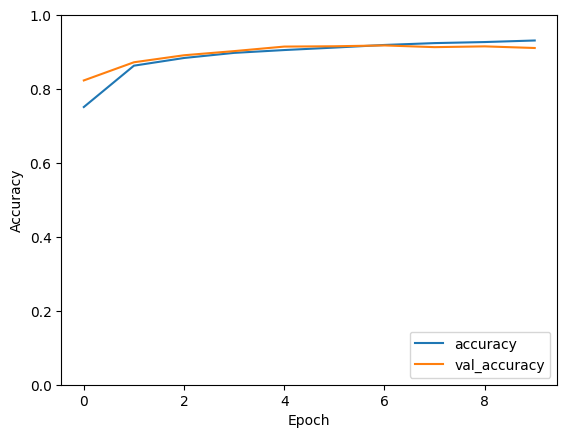

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

###  Técnicas Avanzadas de Regularización: Regularizaciones más avanzadas como L1/L2 o métodos basados en el ruido como Cutout.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
import numpy as np

# 1. Cargar el dataset SVHN y preprocesar datos

In [2]:
# 1. Cargar el dataset SVHN utilizando tensorflow_datasets
(ds_train, ds_test), ds_info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    as_supervised=True,  # Cargar los datos en formato tupla (img, label)
    with_info=True,  # Cargar la metadata del dataset
    batch_size=-1  # Cargar todo el dataset
)

In [3]:
x_train, y_train = tfds.as_numpy(ds_train)
x_test, y_test = tfds.as_numpy(ds_test)

In [4]:
# 2. Preprocesamiento de datos
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización

###  Implementar Cutout

In [5]:
def cutout(img):
    h, w, _ = img.shape
    mask_size = 16  # Tamaño de la máscara

    # Centro del cuadrado
    cx, cy = np.random.randint(w), np.random.randint(h)
    x1 = np.clip(cx - mask_size // 2, 0, w)
    x2 = np.clip(cx + mask_size // 2, 0, w)
    y1 = np.clip(cy - mask_size // 2, 0, h)
    y2 = np.clip(cy + mask_size // 2, 0, h)

    img[y1:y2, x1:x2, :] = 0
    return img


### Aplicar la función augment al dataset

In [6]:
x_train = np.array([cutout(img) for img in x_train])

### Construir y compilar el modelo con L1/L2 Regularization


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenar el modelo

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
2290/2290 [==============================] - 179s 77ms/step - loss: 1.6903 - accuracy: 0.5009 - val_loss: 0.9865 - val_accuracy: 0.7753
Epoch 2/10
2290/2290 [==============================] - 156s 68ms/step - loss: 1.1468 - accuracy: 0.7073 - val_loss: 0.8117 - val_accuracy: 0.8342
Epoch 3/10
2290/2290 [==============================] - 165s 72ms/step - loss: 1.0632 - accuracy: 0.7470 - val_loss: 0.7718 - val_accuracy: 0.8577
Epoch 4/10
2290/2290 [==============================] - 169s 74ms/step - loss: 1.0062 - accuracy: 0.7698 - val_loss: 0.9218 - val_accuracy: 0.8124
Epoch 5/10
2290/2290 [==============================] - 168s 73ms/step - loss: 0.9637 - accuracy: 0.7856 - val_loss: 0.7330 - val_accuracy: 0.8756
Epoch 6/10
2290/2290 [==============================] - 167s 73ms/step - loss: 0.9385 - accuracy: 0.7960 - val_loss: 0.7373 - val_accuracy: 0.8769
Epoch 7/10
2290/2290 [==============================] - 175s 76ms/step - loss: 0.9187 - accuracy: 0.8038 - val_loss: 0

### Evaluar el modelo

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

814/814 [==============================] - 18s 22ms/step - loss: 0.7098 - accuracy: 0.8921
Test accuracy: 0.8920559287071228
